In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
DATASET_DIR = "../dataset/classification/adult"
SAVE_NAME = "adult_original.csv"

In [45]:
df = pd.read_csv(f"{DATASET_DIR}/{SAVE_NAME}")
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [22]:
df.groupby("income").median()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
income,,,,,,
<=50K,34,179465,9,0,0,40
>50K,44,176101,12,0,0,40


In [23]:
df.groupby("income").mean()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
income,,,,,,
<=50K,36.783738,190340.86517,9.595065,148.752468,53.142921,38.840210
>50K,44.249841,188005.00000,11.611657,4006.142456,195.001530,45.473026


In [26]:
pd.crosstab(df["income"],df["education"])

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
income,,,,,,,,,,,,,,,,
<=50K,871,1115,400,162,317,606,487,802,1021,3134,107,8826,764,51,153,5904
>50K,62,60,33,6,16,40,27,265,361,2221,306,1675,959,0,423,1387


In [27]:
pd.crosstab(df["income"],df["workclass"])

workclass,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
income,,,,,,,,,
<=50K,1645,589,1476,7,17733,494,1817,945,14
>50K,191,371,617,0,4963,622,724,353,0


In [29]:
pd.crosstab(df["income"],df["marital-status"])

marital-status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
income,,,,,,,
<=50K,3980,13,8284,384,10192,959,908
>50K,463,10,6692,34,491,66,85


結婚しているかどうかいいかもね

In [47]:
marry_cols = [" Married-AF-spouse", " Married-civ-spouse", " Married-spouse-absent", " Separated", " Widowed"]
is_married = df["marital-status"].isin(marry_cols)
df["is_married"] = np.where(is_married, "Yes", "No")

In [48]:
pd.crosstab(df["income"],df["is_married"])

is_married,No,Yes
income,,
<=50K,14172,10548
>50K,954,6887


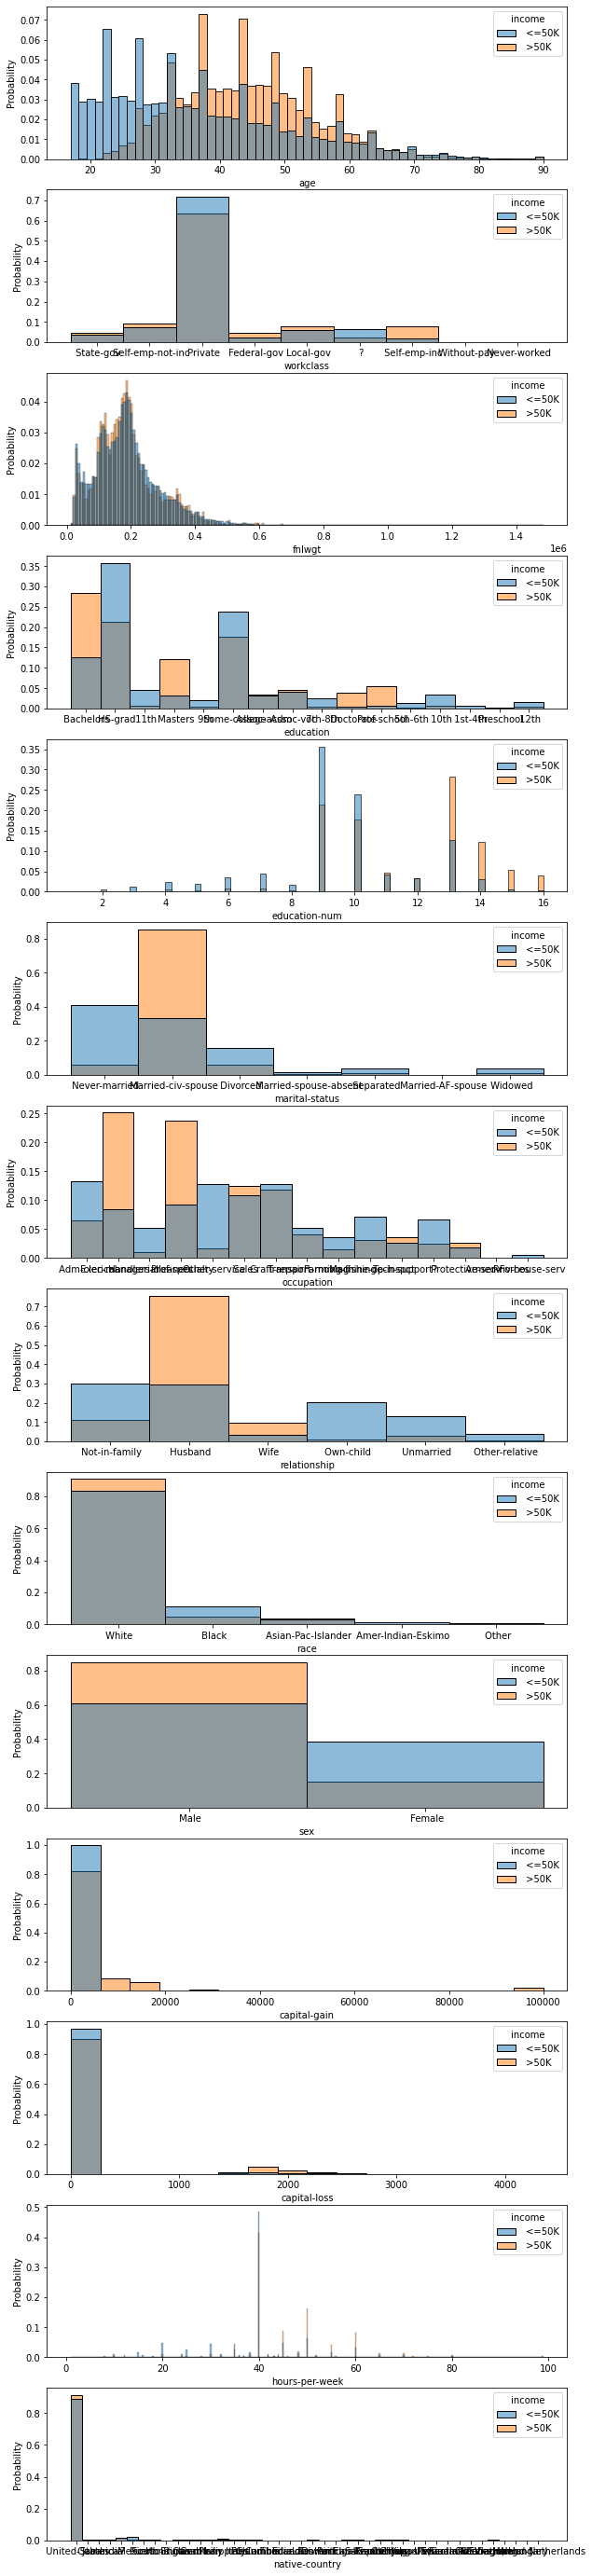

In [15]:
fig, ax = plt.subplots(len(df.columns[:-1]),1, figsize=(10,50))
for i, col in enumerate(df.columns[:-1]):
    g = sns.histplot(x=col, hue="income", stat="probability", common_norm=False, data=df, ax=ax[i], )